# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [ ]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [ ]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

100%|██████████| 9.91M/9.91M [00:00<00:00, 42.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.08MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.77MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.46MB/s]

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


In [ ]:
len(loader_train)

600

### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [ ]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


/usr/local/lib/python3.12/dist-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


## Modelo

In [ ]:
model = torch.nn.Linear(28*28, 10)

In [ ]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.1069,  0.7243, -0.5261,  0.5025,  0.9611, -0.8579,  0.3322,  0.7160,
          0.6987, -0.5388]], grad_fn=<AddmmBackward0>)

In [ ]:
x_train, y_train = next(iter(loader_train))
pred = model(x_train.view(-1, 784))
pred

tensor([[-1.0506e-01, -1.0763e-01, -2.3141e-01,  1.4943e-01,  1.5956e-01,
          1.0272e-01, -1.0068e-01,  1.9211e-01,  1.2145e-02,  1.2084e-01],
        [ 1.4353e-01,  2.8116e-01, -2.5396e-01,  1.2078e-02,  2.0741e-02,
         -2.5761e-01, -1.6569e-01,  8.2699e-03,  4.8866e-02,  2.4914e-02],
        [-3.2557e-01,  2.5335e-01, -1.9694e-01,  4.5425e-02, -3.9186e-02,
         -1.2014e-02, -1.2123e-01,  2.3029e-01,  3.4535e-02,  2.5877e-01],
        [ 9.2625e-02,  8.0543e-02, -5.1963e-04, -6.1064e-02,  1.3197e-01,
          6.4291e-02, -4.5479e-02,  1.4151e-01,  1.0889e-01,  3.2110e-01],
        [-1.9917e-01,  1.5331e-01, -1.8343e-01,  4.7454e-02, -8.4971e-02,
         -1.3404e-01, -4.3737e-02,  2.7414e-01,  1.1059e-01,  1.1218e-01],
        [-2.1495e-01, -8.2296e-02,  1.5067e-01,  2.4319e-01, -2.6921e-02,
         -4.7292e-02, -4.0713e-02,  2.4350e-01,  2.8588e-01,  2.6454e-02],
        [ 6.4400e-02,  3.5928e-02, -2.8579e-01,  5.9348e-02, -5.2913e-02,
          1.3105e-01, -1.0500e-0

## Treinamento

### Inicialização dos parâmetros

In [ ]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [ ]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        if loss.data < best_loss_epoch:
            best_loss_epoch = loss.data
    losses_epoch.append(best_loss_epoch)

In [ ]:
print('Final loss:', loss.data)

Final loss: tensor(0.2438)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

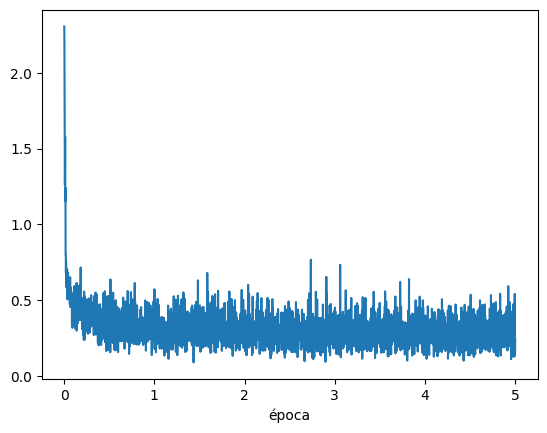

In [ ]:
plt.plot(epochs, losses)
plt.xlabel('época')

In [ ]:
n_epochs

5

Text(0.5, 0, 'época')

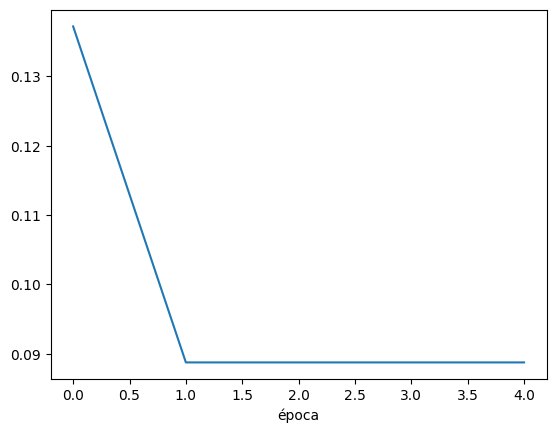

In [ ]:
plt.plot(range(n_epochs), losses_epoch)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

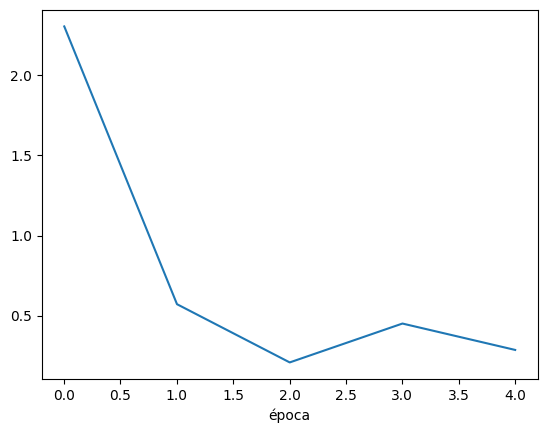

In [ ]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch? R.: 100
2. Em uma época, quantos mini-batches existem? R.: 60.000/100 = 600
3. Qual é a definição de época? época corresponde a treinar o modelo usando todos os exemplos do conjunto de treino exatamente uma vez.

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600
2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

In [ ]:
epochs = []
losses = []
losses_epoch = []
best_loss_epoch = 100

total_trained_samples = 0
for i in range(n_epochs):
    for k, (x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = x_train.view(-1, 28 * 28)
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, y_train)

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # atualiza controle de épocas fracionárias e melhor loss
        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)
        if loss.data < best_loss_epoch:
            best_loss_epoch = loss.data

        #  print ao final de CADA minibatch (Exercício 1)
        print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}")

    losses_epoch.append(best_loss_epoch)


## Conclusões sobre os experimentos deste notebook
